In [38]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np
import numpy.random
import seaborn as sns

In [39]:
df=pd.read_csv('F:\\Time_series\\20thcentury.csv')
print(df.head())

         Date      Time ns1:sex  ns1:lat     lat  Latitudes   ns1:lon  \
0  01-01-1900  00:05:00       M  380900N  380900      38.09  0790400W   
1  01-01-1900  07:00:00       M  415900N  415900      41.59  0024900E   
2  01-01-1900  13:45:00       M  555700N  555700      55.57  0030000W   
3  01-01-1900  07:00:00       F  415900N  415900      41.59  0024900E   
4  01-01-1900  12:00:00       F  352500N  352500      35.25  1364500E   

       lon  Longitudes  
0   790400      -7.904  
1    24900       0.249  
2    30000      -0.300  
3    24900       0.249  
4  1364500      13.645  


## Weekdays

In [40]:
weekdays=[]
for i in df['Date']:
    day=dt.datetime.strptime(i,"%d-%m-%Y").strftime("%A")
    weekdays.append(day)
print(len(weekdays))

14898


In [41]:
df.insert(loc=1,column="Weekdays",value=weekdays)
print(df.head())

         Date Weekdays      Time ns1:sex  ns1:lat     lat  Latitudes  \
0  01-01-1900   Monday  00:05:00       M  380900N  380900      38.09   
1  01-01-1900   Monday  07:00:00       M  415900N  415900      41.59   
2  01-01-1900   Monday  13:45:00       M  555700N  555700      55.57   
3  01-01-1900   Monday  07:00:00       F  415900N  415900      41.59   
4  01-01-1900   Monday  12:00:00       F  352500N  352500      35.25   

    ns1:lon      lon  Longitudes  
0  0790400W   790400      -7.904  
1  0024900E    24900       0.249  
2  0030000W    30000      -0.300  
3  0024900E    24900       0.249  
4  1364500E  1364500      13.645  


## Number of Births in Weekdays

In [42]:
dict={}
for i in weekdays:
    if i not in dict:
        dict[i]=0
    dict[i]=dict[i]+1
print(dict)

{'Monday': 2205, 'Wednesday': 2128, 'Tuesday': 2212, 'Saturday': 2044, 'Thursday': 2120, 'Friday': 2155, 'Sunday': 2034}


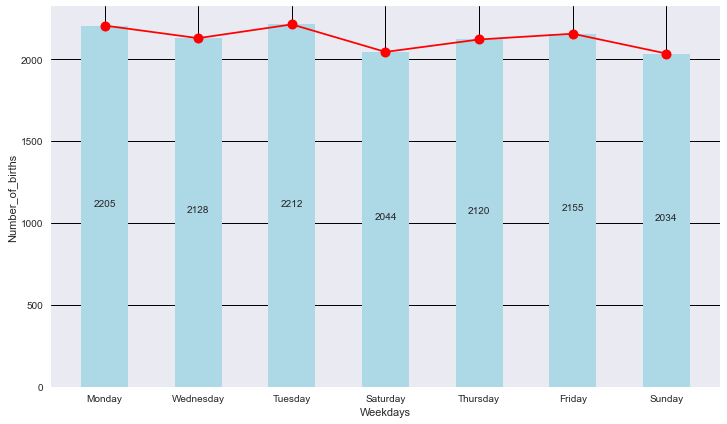

In [43]:
weekdays=list(dict.keys())
Number_of_births=list(dict.values())
fig = plt.figure(figsize = (12,7))
plt.bar(weekdays,Number_of_births, color ='#ADD8E6',width=0.5)

plt.plot(weekdays,Number_of_births, color ='red',marker="o",ms=10)
plt.xlabel("Weekdays")
plt.ylabel("Number_of_births")
for i in range(len(weekdays)):
    plt.text(i, Number_of_births[i]//2, Number_of_births[i], ha = 'center')

## Yearly Births

In [44]:
df["Date"] = pd.to_datetime(df["Date"])
# df['year']=pd.DatetimeIndex(df['Date']).year
df["year"] = df["Date"].dt.strftime("%Y")
df["month"] = df["Date"].dt.strftime("%B")
df["quarter"] = df["Date"].dt.quarter

In [45]:
# Yearly Births
Ydata = df.groupby("year").size().reset_index(name="Number_of_Births")
print(Ydata)
print()
print("Total Number of Births:- ",Ydata['Number_of_Births'].sum())

    year  Number_of_Births
0   1900               111
1   1901                93
2   1902                99
3   1903               104
4   1904               105
..   ...               ...
95  1995                26
96  1996                37
97  1997                34
98  1998                21
99  1999                24

[100 rows x 2 columns]

Total Number of Births:-  14898


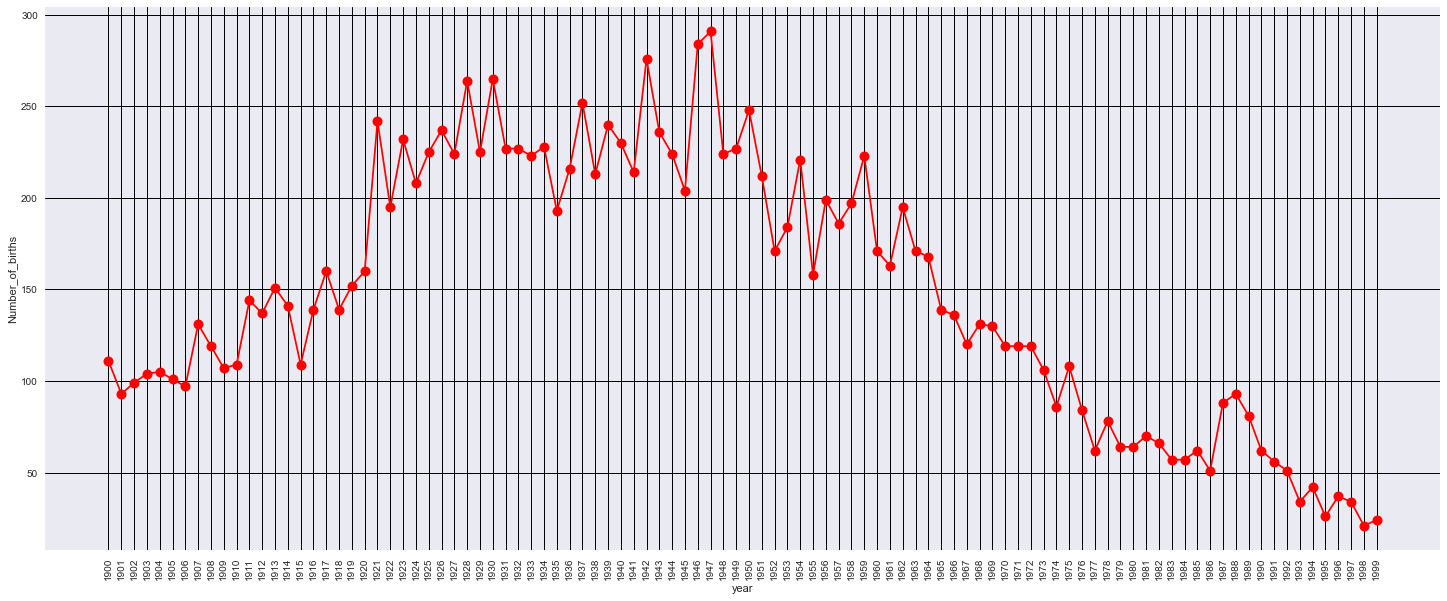

In [46]:
year = Ydata["year"].tolist()
Number_of_births = Ydata['Number_of_Births'].tolist()
fig = plt.figure(figsize = (25,10))
#plt.bar(year,Number_of_births, color ='#ADD8E6',width=0.5)

plt.plot(year,Number_of_births, color ='red',marker="o",ms=10)

plt.xlabel("year")
plt.ylabel("Number_of_births")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()
#for i in range(len(year)):
  #  plt.text(i, Number_of_births[i]//2, Number_of_births[i], ha = 'center')

## Monthly Births 

In [47]:
# Monthly Births 
MonthlyBirths=df.groupby(["year","month"])["year"].count().unstack()
MonthlyBirths = MonthlyBirths.fillna(0)
MonthlyBirths=MonthlyBirths.astype({'January':'int','February':'int','March':'int','April':'int','May':'int','June':'int','July':'int','August':'int','September':'int','October':'int','November':'int','December':'int'})
MonthlyBirths=MonthlyBirths[["January","February","March","April","May","June","July","August","September","October","November","December"]]
#print(MonthlyBirths)
TotalMonthlyBirths=MonthlyBirths.sum()
print(TotalMonthlyBirths)

month
January      1381
February     1163
March        1248
April        1172
May          1300
June         1231
July         1211
August       1332
September    1210
October      1280
November     1110
December     1260
dtype: int64


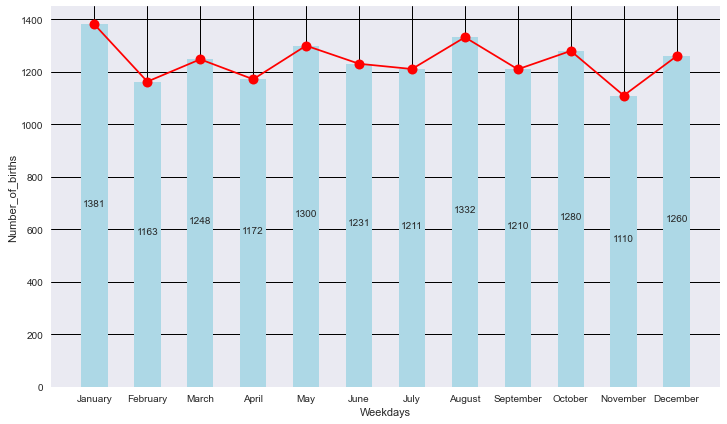

In [48]:
type(TotalMonthlyBirths)
fig = plt.figure(figsize = (12,7))
Months=["January","February","March","April","May","June","July","August","September","October","November","December"]
plt.bar(Months,TotalMonthlyBirths, color ='#ADD8E6',width=0.5)

plt.plot(Months,TotalMonthlyBirths, color ='red',marker="o",ms=10)
plt.xlabel("Weekdays")
plt.ylabel("Number_of_births")
for i in range(len(Months)):
    plt.text(i, TotalMonthlyBirths[i]//2, TotalMonthlyBirths[i], ha = 'center')

## Quarterly Births 

In [49]:
# Quarterly Births
QuarterlyBirths=df.groupby(["year","quarter"])["year"].count().unstack()
print(QuarterlyBirths)
print(QuarterlyBirths.sum())

quarter   1   2   3   4
year                   
1900     35  27  23  26
1901     35  16  30  12
1902     24  24  33  18
1903     29  23  27  25
1904     31  23  27  24
...      ..  ..  ..  ..
1995      5   4   7  10
1996      8  11  10   8
1997     13   7   6   8
1998      6   7   4   4
1999      7   6   8   3

[100 rows x 4 columns]
quarter
1    3792
2    3703
3    3753
4    3650
dtype: int64


<Figure size 2160x720 with 0 Axes>

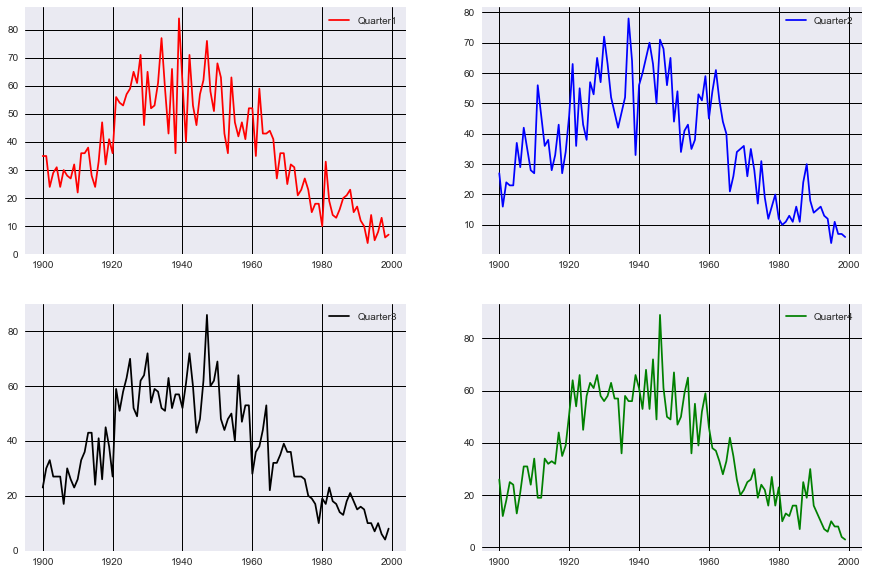

In [51]:
years= list(range(1900, 2000))
fig = plt.figure(figsize = (30,10))
fig, ax = plt.subplots(2, 2,figsize=(15,10))

Quarter1=ax[0,0].plot(years,QuarterlyBirths[1], color ='red',ms=10,label="Quarter1")
leg =ax[0,0].legend(loc='upper right')
Quarter2=ax[0,1].plot(years,QuarterlyBirths[2], color ='blue',ms=10,label="Quarter2")
leg = ax[0,1].legend(loc='upper right')
Quarter3=ax[1,0].plot(years,QuarterlyBirths[3], color ='black',ms=10,label="Quarter3")
leg = ax[1,0].legend(loc='upper right')
Quarter4=ax[1,1].plot(years,QuarterlyBirths[4], color ='green',ms=10,label="Quarter4")
leg = plt.legend(loc='upper right')
plt.show()

## Gender Births


In [52]:
# df['year']=pd.DatetimeIndex(df['Date']).year
GenderBirths=df.groupby(['year','ns1:sex'])['Date'].count().unstack()
GenderBirths['F'] = GenderBirths['F'].fillna(0)
GenderBirths=GenderBirths.astype({'F':'int','M':'int'})
print(GenderBirths)
print(GenderBirths.sum())

ns1:sex   F   M
year           
1900     34  77
1901     31  62
1902     30  69
1903     32  72
1904     36  69
...      ..  ..
1995      9  17
1996      2  35
1997      0  34
1998      1  20
1999      1  23

[100 rows x 2 columns]
ns1:sex
F     4380
M    10518
dtype: int64


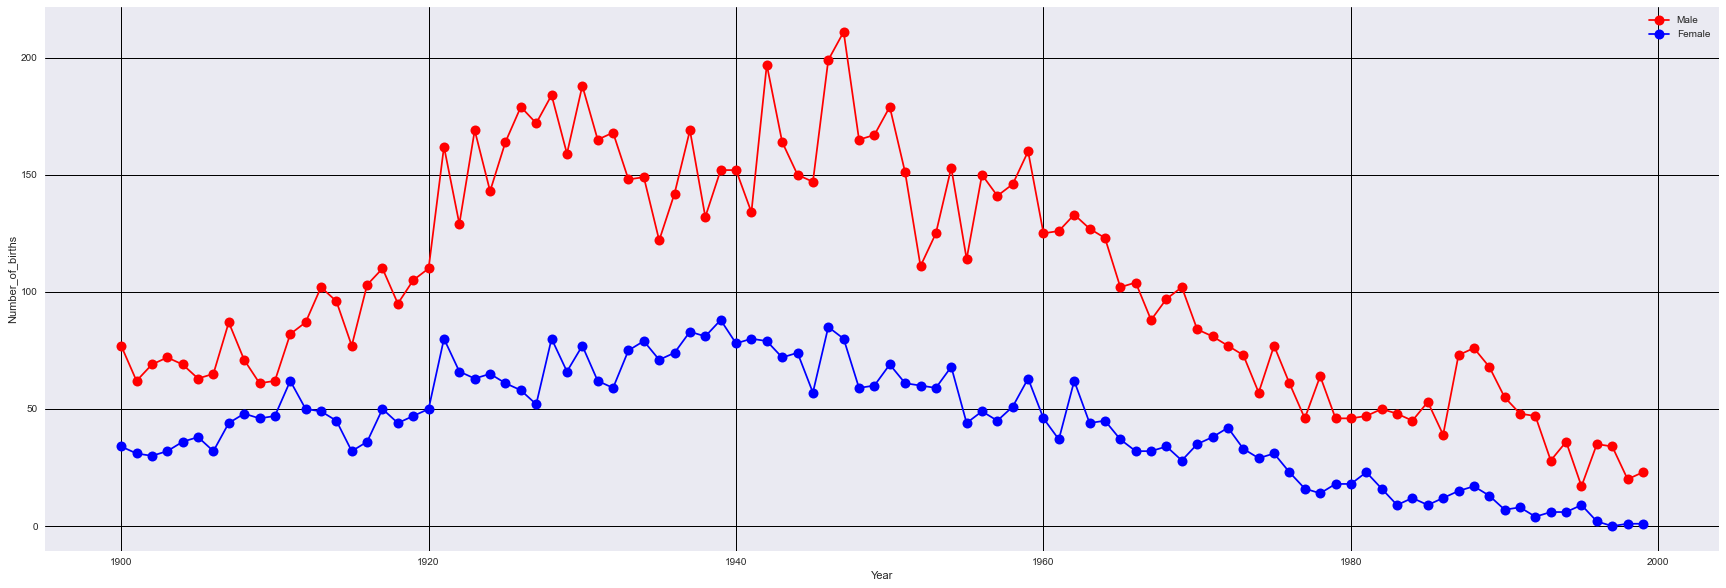

In [53]:
years= list(range(1900, 2000))
fig = plt.figure(figsize = (30,10))
Male=plt.plot(years,GenderBirths['M'], color ='red',marker="o",ms=10,label="Male")
Female=plt.plot(years,GenderBirths['F'], color ='blue',marker="o",ms=10,label="Female")
leg = plt.legend(loc='upper right')
plt.xlabel("Year")
plt.ylabel("Number_of_births")
plt.show()

In [54]:
# df['year']=pd.DatetimeIndex(df['Date']).year
df.groupby(["year","ns1:sex"]).size().reset_index(name='count')


,year,ns1:sex,count
0,1900,F,34
1,1900,M,77
2,1901,F,31
3,1901,M,62
4,1902,F,30
...,...,...,...
194,1997,M,34
195,1998,F,1
196,1998,M,20
197,1999,F,1


## Week Births 

In [55]:
df["weeknumber"] = df["Date"].dt.strftime("%V")

In [56]:
weeks=df.groupby(['year','weeknumber'])['Date'].count().unstack().fillna(0).transpose().astype(int)
weeks

year,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
weeknumber,,,,,,,,,,,,,,,,,,,,,
01,6,1,0,0,0,1,0,0,0,1,...,1,2,1,0,1,0,1,1,0,0
02,0,2,2,0,3,2,1,4,2,1,...,2,0,1,1,0,2,0,0,1,0
03,5,4,0,2,6,1,1,0,2,2,...,2,1,0,0,2,1,2,1,0,1
04,1,0,1,4,2,4,2,3,3,2,...,1,0,0,0,0,1,1,3,0,0
05,2,2,4,1,3,3,2,2,1,4,...,0,1,0,0,2,0,0,0,1,0
06,0,2,3,3,3,2,4,4,0,1,...,1,3,0,0,1,0,0,1,1,1
07,1,3,1,3,1,1,1,2,1,4,...,2,1,1,0,0,0,0,0,2,1
08,5,1,2,3,4,1,2,2,2,4,...,3,1,2,1,2,1,1,2,0,0
09,1,3,3,3,0,2,3,0,1,5,...,1,1,1,0,3,0,1,1,1,2


0       6
1       0
2       5
3       1
4       2
       ..
5295    0
5296    0
5297    1
5298    0
5299    0
Length: 5300, dtype: int32


<AxesSubplot:>

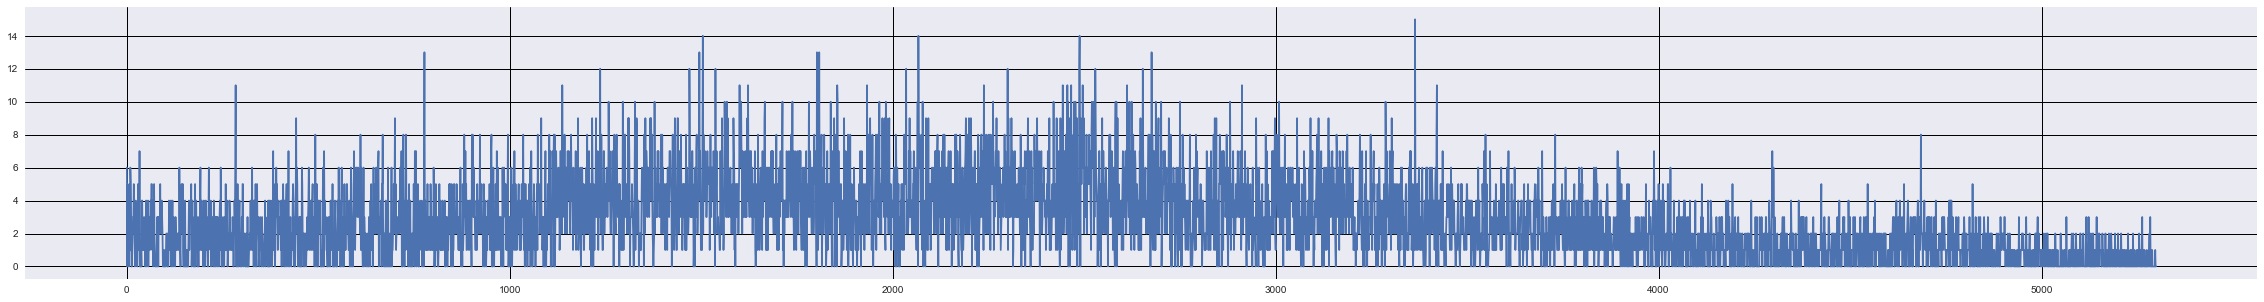

In [57]:
seq=pd.Series(weeks.values.ravel('F'))
f = plt.figure(figsize=(40,5))
print(seq)
seq.plot()

In [58]:
#f = plt.figure(figsize=(40,20))
#seq.iloc[0:254].plot()

## Monthly Births 


In [59]:
# Monthly Births 
MonthlyBirths=df.groupby(["year","month"])["year"].count().unstack()
MonthlyBirths = MonthlyBirths.fillna(0)
MonthlyBirths=MonthlyBirths.astype({'January':'int','February':'int','March':'int','April':'int','May':'int','June':'int','July':'int','August':'int','September':'int','October':'int','November':'int','December':'int'})
MonthlyBirths=MonthlyBirths[["January","February","March","April","May","June","July","August","September","October","November","December"]]
#print(MonthlyBirths)
TotalMonthlyBirths=MonthlyBirths.sum()
print(TotalMonthlyBirths)

month
January      1381
February     1163
March        1248
April        1172
May          1300
June         1231
July         1211
August       1332
September    1210
October      1280
November     1110
December     1260
dtype: int64


0       12
1        7
2        6
3        7
4       12
        ..
1195     4
1196     1
1197     3
1198     1
1199     1
Length: 1200, dtype: int32


<AxesSubplot:>

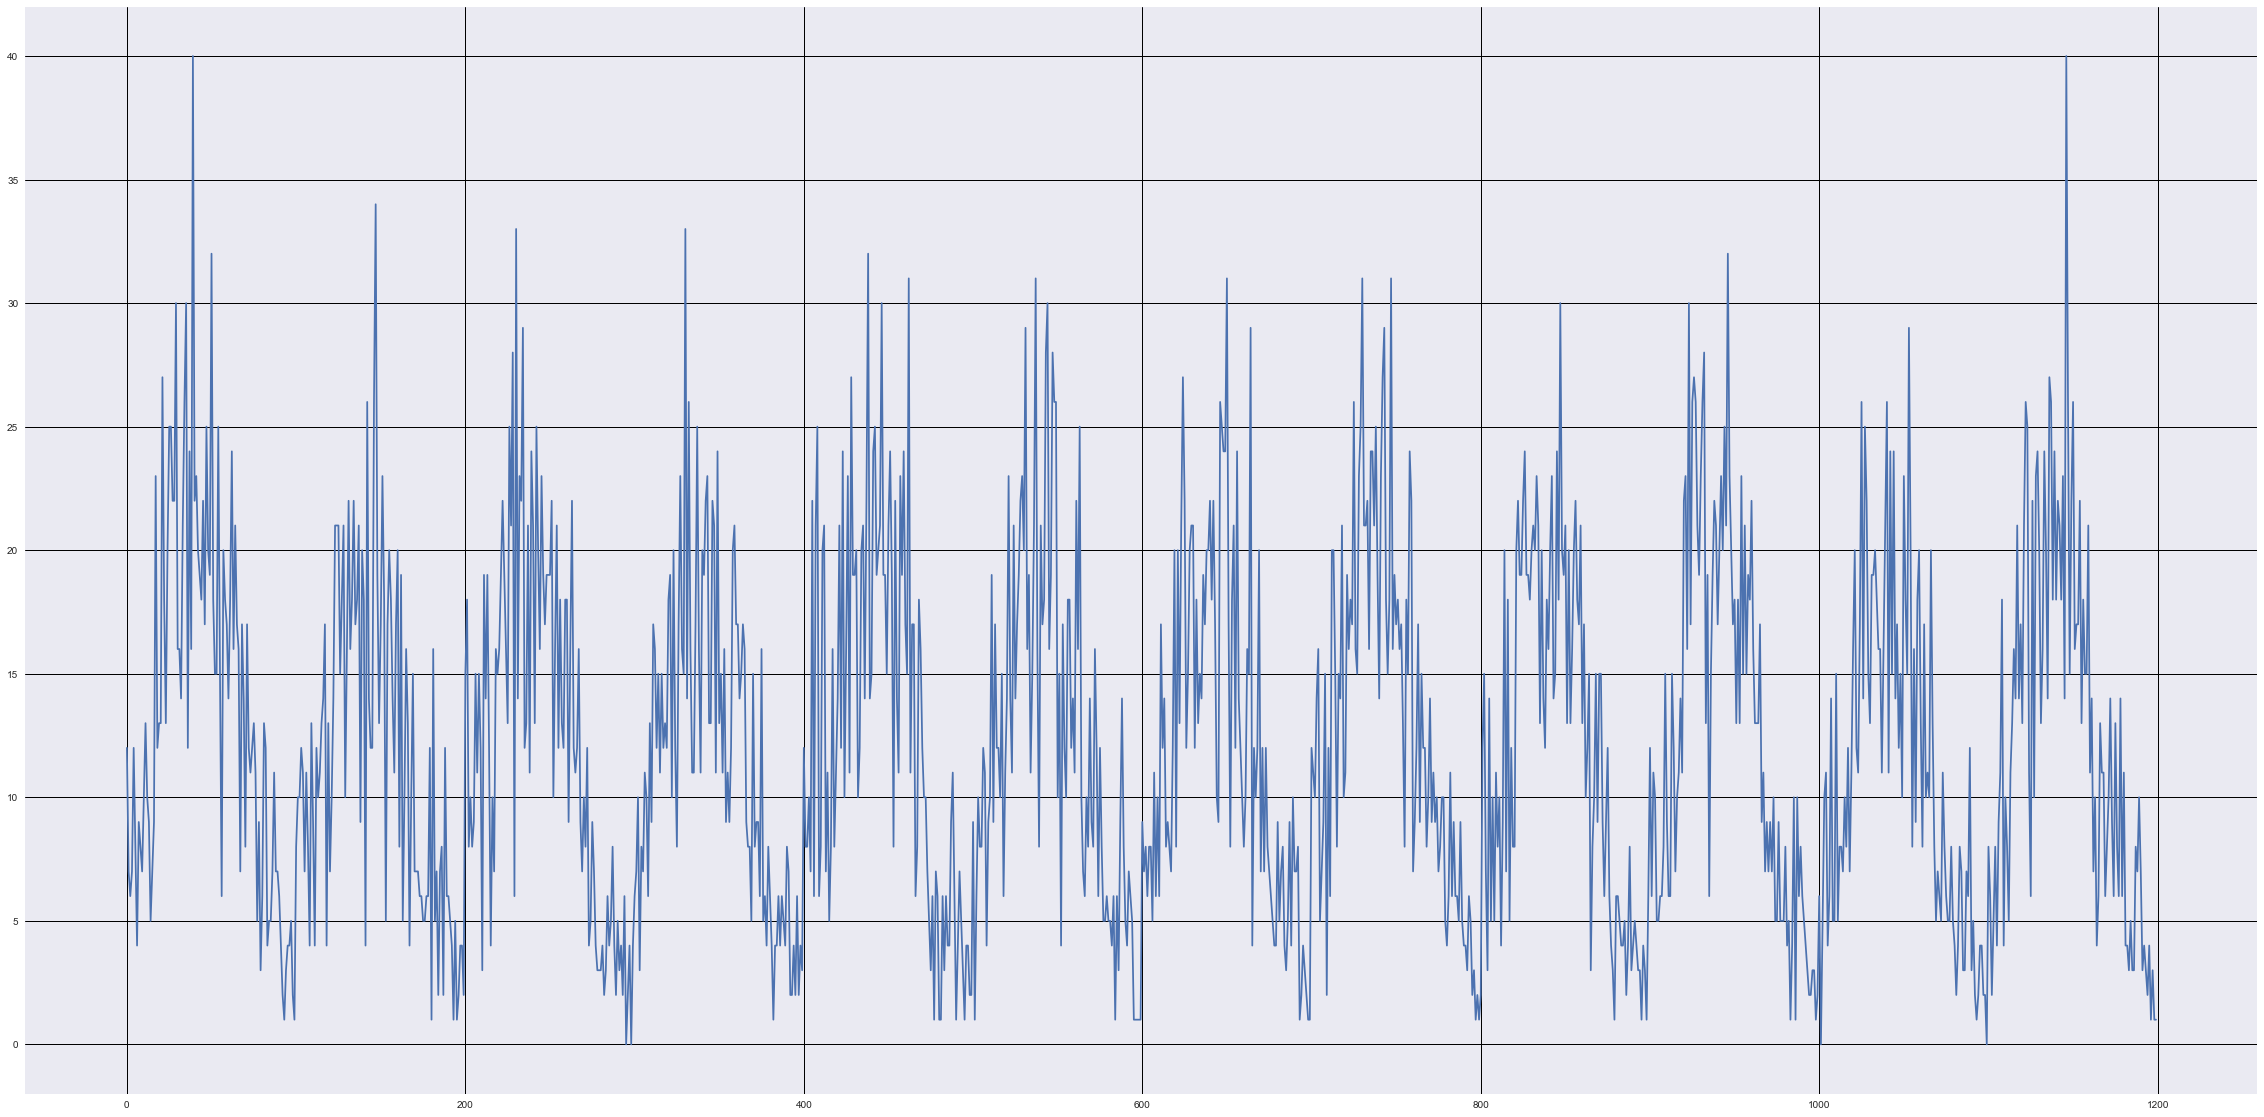

In [60]:
MonthBirths=pd.Series(MonthlyBirths.values.ravel('F'))
f = plt.figure(figsize=(40,20))
print(MonthBirths)
MonthBirths.plot()

In [61]:
Means=seq.rolling(50).mean()
deviations=seq.rolling(50).std()

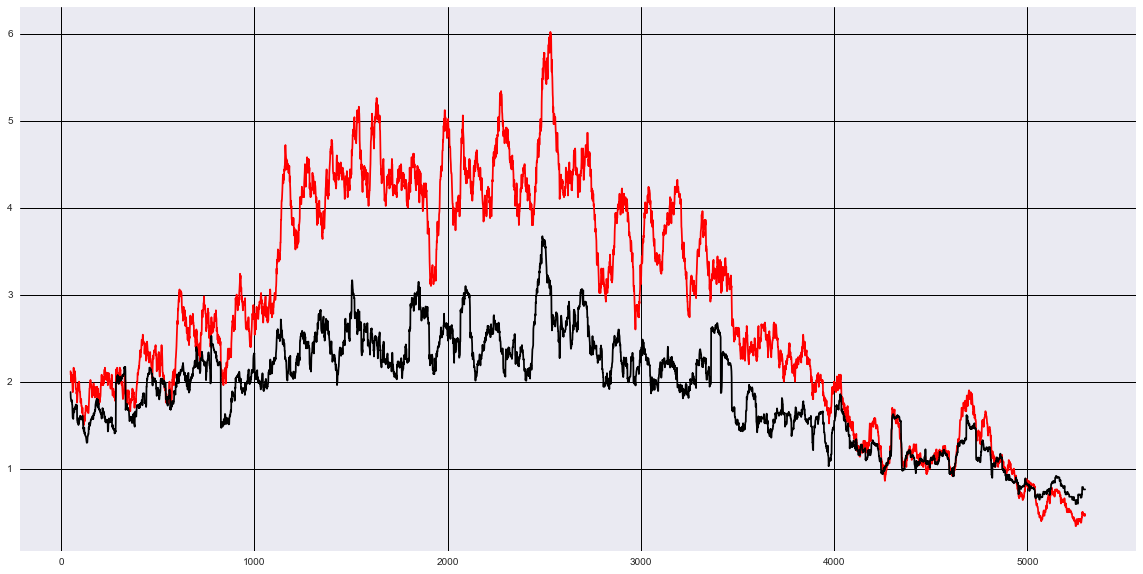

In [62]:
f = plt.figure(figsize=(20,10))
plt.plot(Means, color="red", label="Rolling Mean Passenger Number")
plt.plot(deviations, color="black", label = "Rolling Standard Deviation in Passenger Number")

In [63]:
rolling_mean = MonthBirths.rolling(5).mean()
rolling_std = MonthBirths.rolling(5).std()

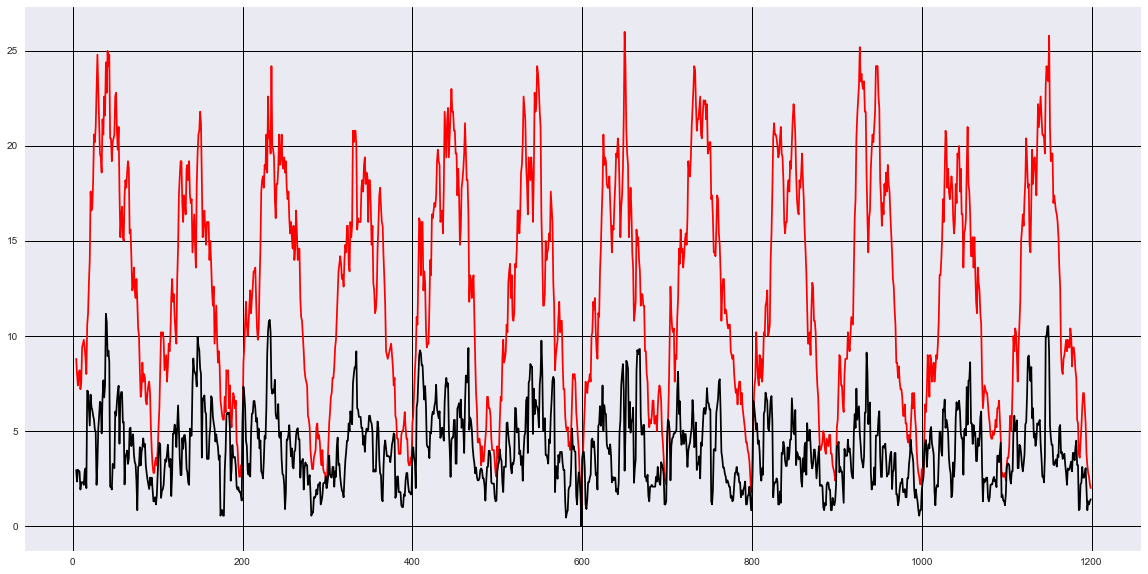

In [64]:
f = plt.figure(figsize=(20,10))

plt.plot(rolling_mean, color="red", label="Rolling Mean Passenger Number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number")


In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose


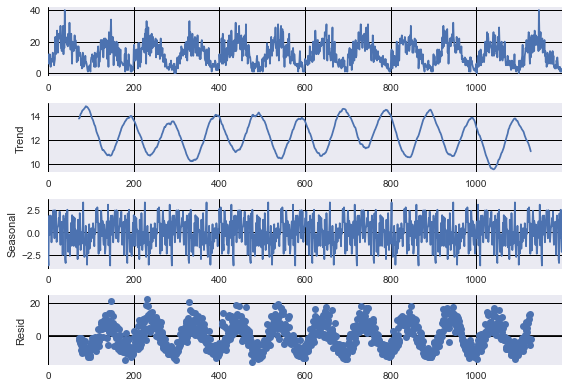

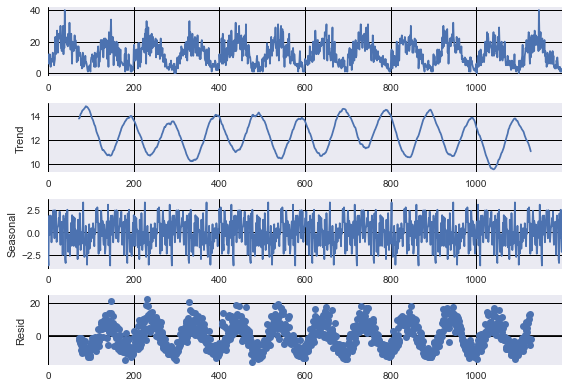

In [74]:
decompose = seasonal_decompose(MonthBirths,model='additive', period=144)
decompose.plot()

## Heat map 

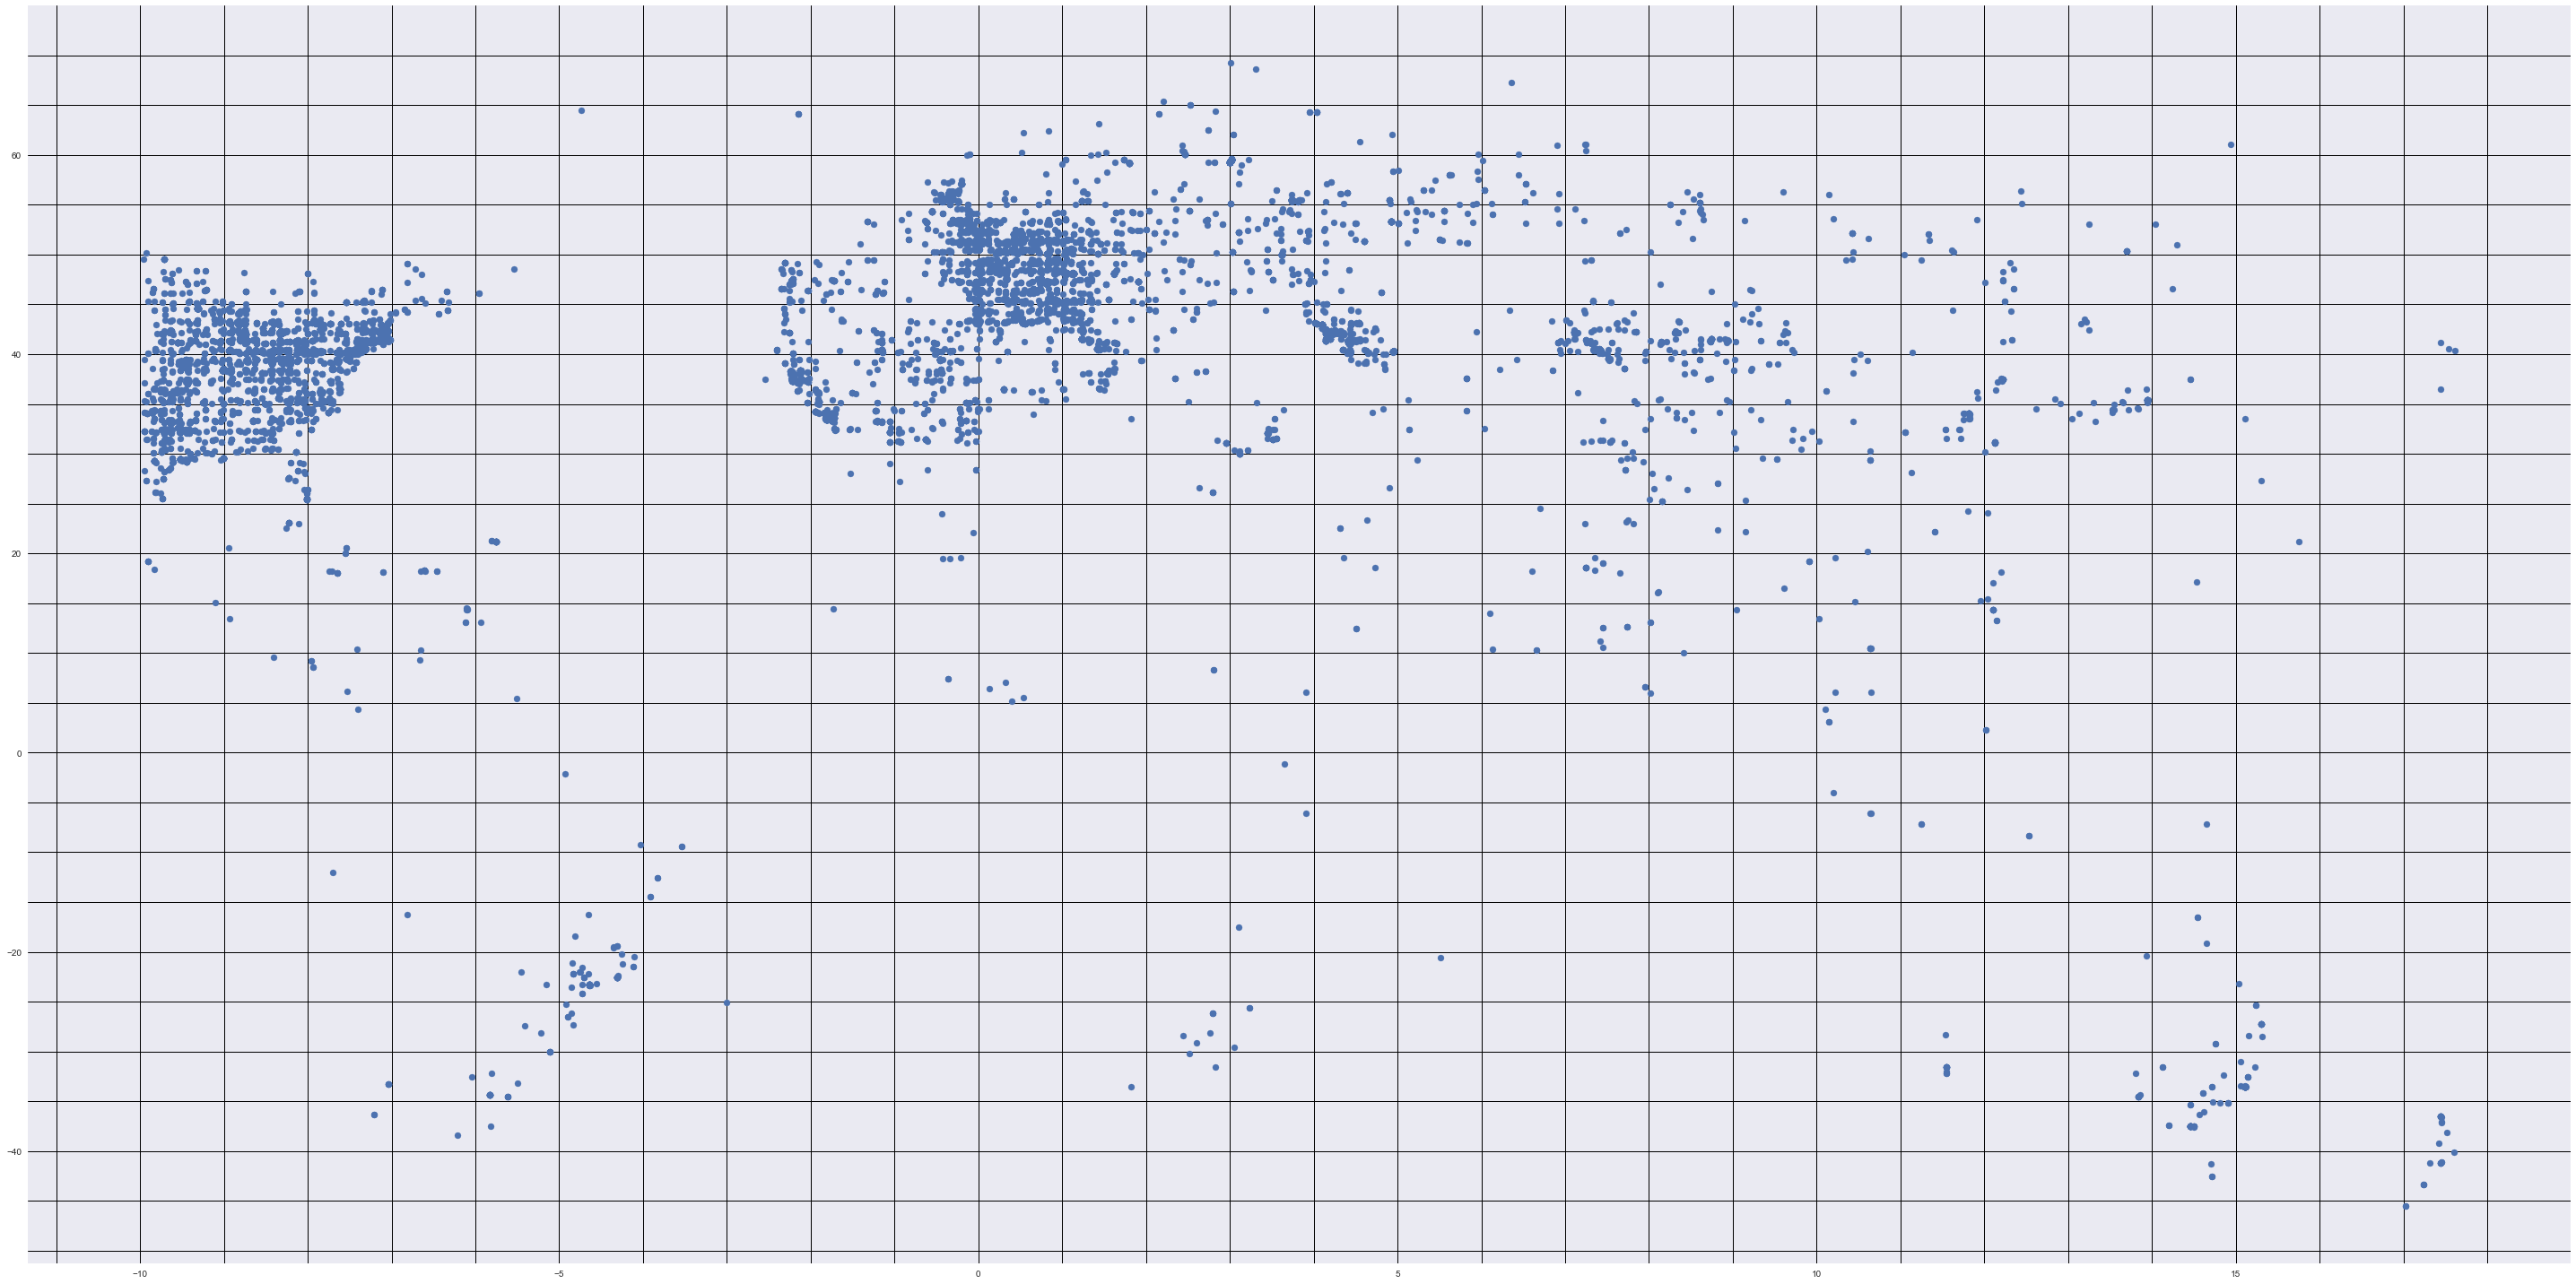

In [67]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(40,20))
plt.style.use('seaborn')
plt.rc('grid', linestyle="-", color='black')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='black')
plt.scatter(x=df['Longitudes'], y=df['Latitudes'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
import plotly.express as px
px.scatter(df,x=df['Longitudes'], y=df['Latitudes'])

In [69]:
fig = px.density_heatmap(df, x=df['Longitudes'], y=df['Latitudes'], nbinsx=20, nbinsy=20, color_continuous_scale="Viridis")
fig.show()

In [70]:
fig = px.density_heatmap(df, x=df['Longitudes'], y=df['Latitudes'], text_auto=True)
fig.show()